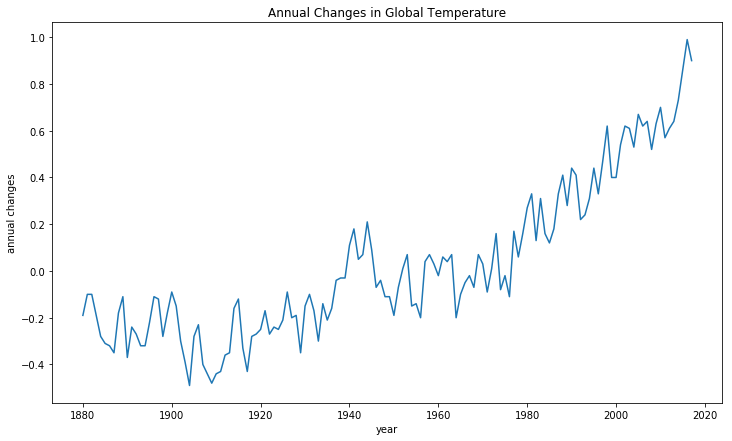

In [1]:
import numpy as np
import matplotlib.pylab as plt
import csv

data = open('data/Global_Temperature.csv','r')
dataline = csv.reader(data)
year_list = []
data_origin_list = []
for line in dataline:
    data_origin_list.append(float(line[1]))
    year_list.append(int(line[0][-4:]))
    
year = np.array(year_list)
data_origin = np.array(data_origin_list,dtype='float64')

fig_1 = plt.figure()
fig_1.set_size_inches(12,7)

plt.xlabel('year')
plt.ylabel('annual changes')
plt.title('Annual Changes in Global Temperature')
plt.plot(year,data_origin)
plt.savefig('output/original_data.png')
plt.show()

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


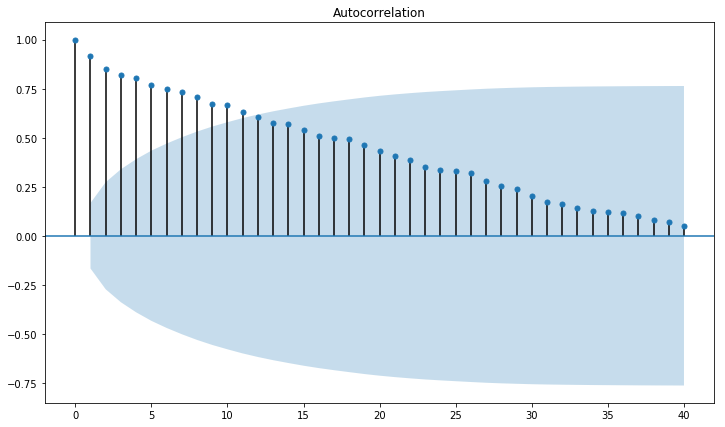

In [2]:
%matplotlib inline
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot original acf
plt.rcParams['figure.figsize'] = (12, 7)

plot_acf(data_origin,lags=40)
plt.savefig('output/ACF_original_data.png')
plt.show()

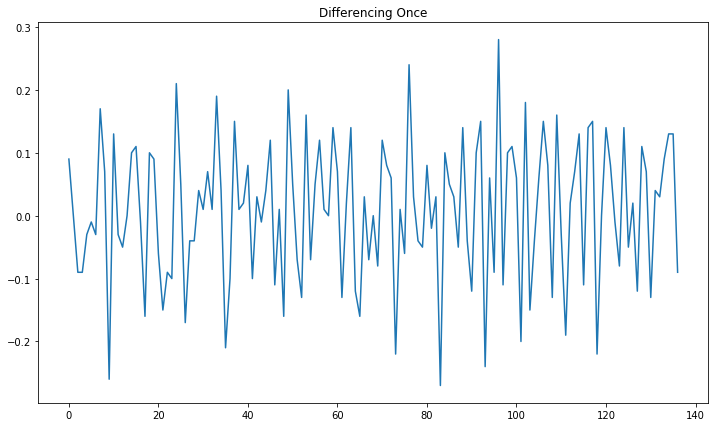

In [3]:
# differencing once and plot the data
data_diff1 = np.diff(data_origin)
fig_2 = plt.figure()
fig_2.set_size_inches(12,7)
plt.plot(np.arange(np.shape(data_diff1)[0]),data_diff1)
plt.title('Differencing Once')
plt.savefig('output/Differencing_Once.png')
plt.show()

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


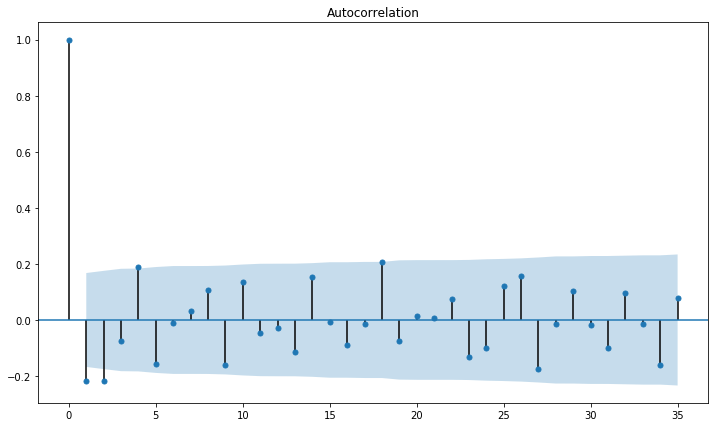

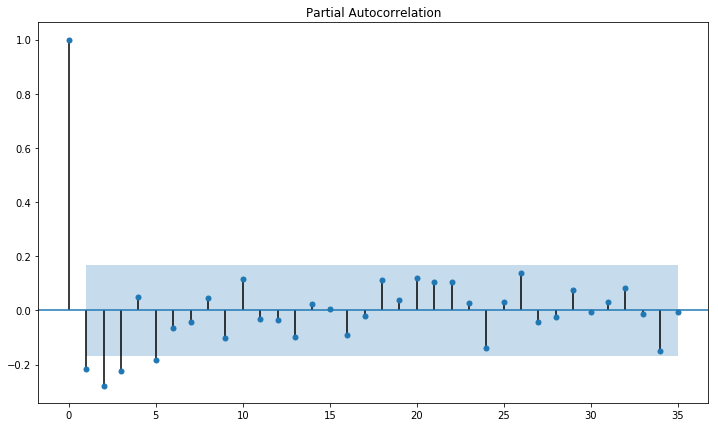

In [4]:
# plot acf and pacf of differencing once
plot_acf(data_diff1,lags=35).show()
plt.savefig('output/Sample_acf_1.png')
plot_pacf(data_diff1,lags=35).show()
plt.savefig('output/Sample_pacf_1.png')

Suitable lam is:  -0.37
Max llf is:  166.06


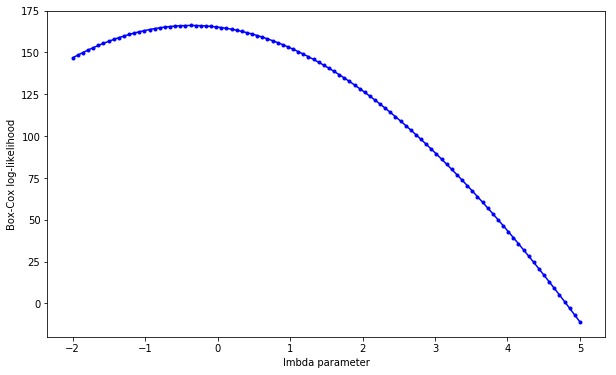

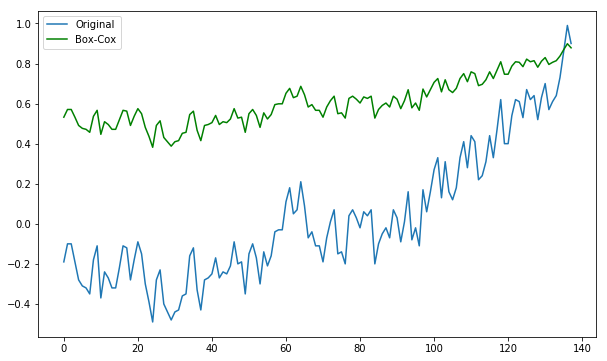

In [12]:
# box-cox transformation 
from scipy import stats,special

lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)


c=1
data_trans_1 = data_origin + c
# lambda estimate:
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, data_trans_1)
    
# find the max lgo-likelihood(llf) index and decide the lambda
lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))

plt.rcParams['figure.figsize'] = (10, 6)
plt.figure()
plt.plot(lam_range,llf,'b.-')

plt.xlabel('lmbda parameter')
plt.ylabel('Box-Cox log-likelihood')
plt.savefig('output/Box_cox log_likelihood function')

plt.show()

# boxcox convert:
# inverse boxcox convert:
data_boxcox = special.boxcox1p(data_trans_1, lam_best)
data_invboxcox = special.inv_boxcox1p(data_boxcox, lam_best) - c 

plt.plot(data_origin, label='Original')
plt.plot(data_boxcox, color='green',label='Box-Cox')

plt.legend()
plt.savefig('output/BoxCoxTran.png')
plt.show()

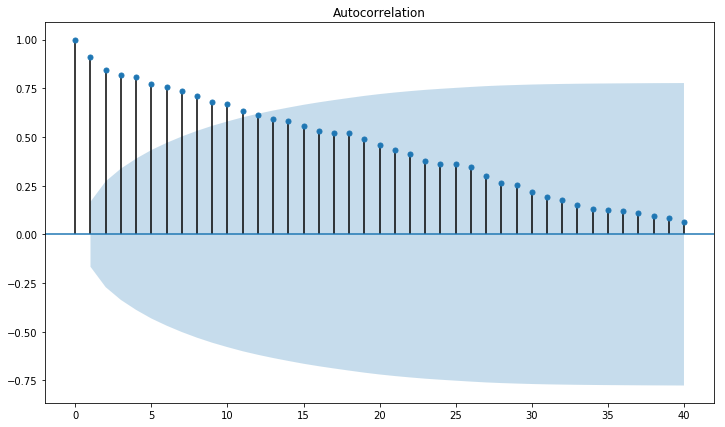

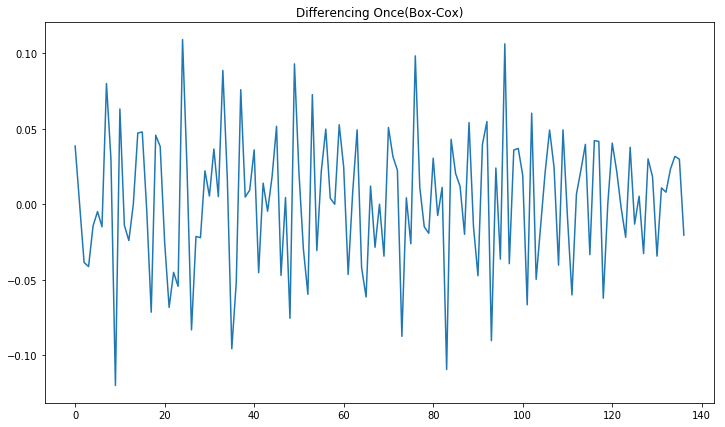

In [13]:
plt.rcParams['figure.figsize'] = (12, 7)

plot_acf(data_boxcox,lags=40)
plt.savefig('output/ACF_boxcox_data.png')
plt.show()

data_boxcox_diff1 = np.diff(data_boxcox)
plt.plot(np.arange(np.shape(data_boxcox_diff1)[0]),data_boxcox_diff1)
plt.title('Differencing Once(Box-Cox)')
plt.savefig('output/Differencing_Once_boxcox.png')
plt.show()

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


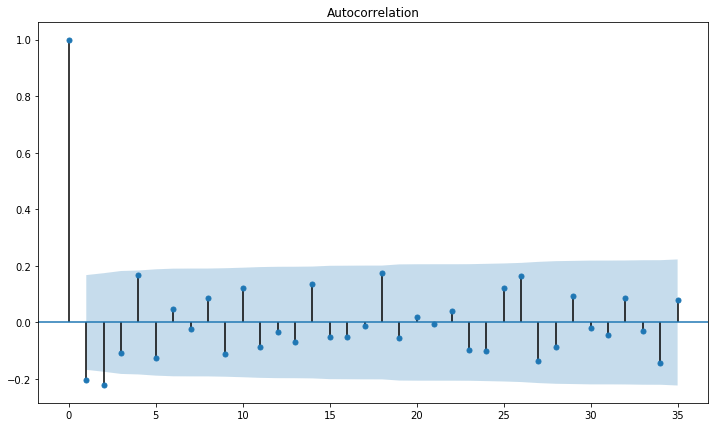

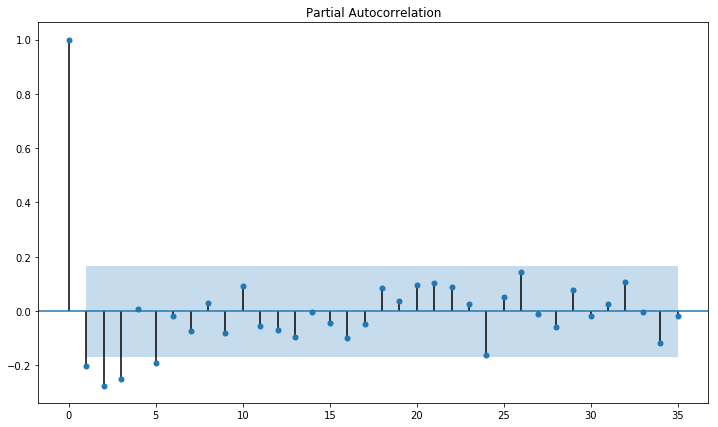

In [15]:
# plot acf and pacf of differencing once
plt.rcParams['figure.figsize'] = (12, 7)
plot_acf(data_boxcox_diff1,lags=35).show()
plt.savefig('output/Sample_acf_boxcox.png')
plot_pacf(data_boxcox_diff1,lags=35).show()
plt.savefig('output/Sample_pacf_boxcox.png')

In [14]:
from statsmodels.tsa.arima_model import ARIMA
print('(p,q)  aic')
smallest_aic = 100
smallest_combination= (0,0)
for p in range(9):
    for q in range(7):
        model = ARIMA(data_boxcox, order=(p, 1, q))  
        try:
            result = model.fit() 
            aic = result.aic
            if aic< smallest_aic:
                smallest_aic = aic
                smallest_combination= (p,q)
            print('(',p,q,')  ', aic)
        except:    
            pass
        
print('finished')
print('smallest aic is:',smallest_aic )
print('where the combination of p and q is:',smallest_combination)

(p,q)  aic
( 0 0 )   -459.3187093697928
( 0 1 )   -471.70597876022396
( 0 2 )   -480.35591210842847


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

( 0 3 )   -479.4559020799268
( 0 4 )   -479.7114113524839
( 1 0 )   -463.0484238490558
( 1 1 )   -479.4480183005884
( 1 2 )   -478.95840183712755
( 1 3 )   -483.4551087868747
( 1 4 )   -481.4700553537343


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 1 5 )   -479.58726267645045


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 1 6 )   -477.6413775450503
( 2 0 )   -471.6827867838691
( 2 1 )   -479.411115313801


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/U

( 2 3 )   -481.4678046836526


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 4 )   -479.46260892332975


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 5 )   -474.68150121832196


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 6 )   -471.93062854344646
( 3 0 )   -478.3105562322238
( 3 1 )   -477.4262136121562
( 4 0 )   -476.3200101009469


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 1 )   -476.28524769191995


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 2 )   -477.5913464316428


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 3 )   -475.7328065137725


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 0 )   -479.37950894378764
( 5 1 )   -477.56117987735513


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 2 )   -476.13239441846395


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 3 )   -475.88984270440085


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]


( 5 4 )   nan
( 6 0 )   -477.4413695381413


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 1 )   -476.0991013532945


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 2 )   -474.8900753210014


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 3 )   -476.18732556001794


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 4 )   -473.72628804839053


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 5 )   -471.8479830665008
( 7 0 )   -476.20237436736215


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 1 )   -475.8020707159402


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 2 )   -473.9002344320503


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 3 )   -470.2722255433214


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 4 )   -469.3540916264601


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 5 )   -470.1870767669418
( 8 0 )   -474.330603279511


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 1 )   -472.3218889006163


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 2 )   -473.34591023960184


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 3 )   -468.82520479496986


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 4 )   -471.0868651193805


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 5 )   -469.2142735292615
( 8 6 )   -470.3647243273987
finished
smallest aic is: -483.4551087868747
where the combination of p and q is: (1, 3)


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
# lambda = 0
data_boxcox_2 = special.boxcox1p(data_trans_1, 0)
print('(p,q)  aic')
smallest_aic = 100
smallest_combination= (0,0)
for p in range(9):
    for q in range(7):
        model = ARIMA(data_boxcox_2, order=(p, 1, q))  
        try:
            result = model.fit() 
            aic = result.aic
            if aic< smallest_aic:
                smallest_aic = aic
                smallest_combination= (p,q)
            print('(',p,q,')  ', aic)
        except:    
            pass
        
print('finished')
print('smallest aic is:',smallest_aic )
print('where the combination of p and q is:',smallest_combination)

(p,q)  aic
( 0 0 )   -392.44507003908564
( 0 1 )   -405.1655445436405
( 0 2 )   -413.2747080351122


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

( 0 3 )   -412.2129178874719
( 0 4 )   -412.57376812837265
( 1 0 )   -396.44137007391885
( 1 1 )   -412.3122894749646
( 1 2 )   -411.78261701593135
( 1 3 )   -416.2473792429329


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 1 4 )   -414.27583578478016
( 1 5 )   -412.4085812451982


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 1 6 )   -410.4709809491761
( 2 0 )   -405.1282414355395
( 2 1 )   -412.22482026503167


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 2 )   -408.5990081471932
( 2 3 )   -414.2735190784639


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 4 )   -412.26804773078754


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 5 )   -411.7778058923915


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 6 )   -410.48899147598297
( 3 0 )   -411.3851211434488
( 3 1 )   -411.68339944692764
( 4 0 )   -409.438699194955


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 1 )   -408.8490039431483


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 2 )   -412.6860029077294


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 3 )   -408.24626611463407
( 5 0 )   -412.45136196439523


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 1 )   -410.79037203493317


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 2 )   -408.68070130968385


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 3 )   -408.808767573895


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 4 )   -404.5811154581131
( 6 0 )   -410.6036788059098


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 1 )   -409.1042941894523


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 2 )   -407.3745555909828


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 3 )   -406.7820904088185


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 4 )   -404.45692255560846
( 6 5 )   -391.0011329254405
( 7 0 )   -409.23794099551094


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 1 )   -409.00008807611755


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 2 )   -407.5915197949648


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 3 )   -406.782967991869


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:652: RuntimeWarning: divide by zero encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:652: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: invalid value encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

( 7 4 )   nan


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 5 )   -403.4888920694931


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 0 )   -407.3898386652171


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 1 )   -406.03389982901


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 2 )   -406.9870203599522


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 3 )   -401.9087157203388


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 4 )   -404.38510842894414


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 8 5 )   -402.4396919883012
( 8 6 )   -402.40959800255234
finished
smallest aic is: -416.2473792429329
where the combination of p and q is: (1, 3)


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:

data_boxcox_3 = special.boxcox1p(data_trans_1, 1)
print('(p,q)  aic')
smallest_aic = 100
smallest_combination= (0,0)
for p in range(8):
    for q in range(7):
        model = ARIMA(data_origin[:101], order=(p, 1, q))  
        try:
            result = model.fit(disp=-1) 
            aic = result.aic
            if aic< smallest_aic:
                smallest_aic = aic
                smallest_combination= (p,q)
            print('(',p,q,')  ', aic)
        except:    
            pass
        
print('finished')
print('smallest aic is:',smallest_aic )
print('where the combination of p and q is:',smallest_combination)

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

(p,q)  aic
( 0 0 )   -151.3566569363305
( 0 1 )   -159.25158997811167
( 0 2 )   -164.706162339279
( 0 3 )   -164.24222476970033
( 0 4 )   -163.30334281411416
( 1 0 )   -153.48709352631937
( 1 1 )   -165.17280481772485
( 1 2 )   -163.6994256970807
( 1 3 )   -167.5183359433032
( 1 4 )   -165.5238117842768


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 1 5 )   -161.1536021073772


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 1 6 )   -161.23253487935824
( 2 0 )   -158.35503096198454
( 2 1 )   -163.7061710025538


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 2 )   -162.4537844836937
( 2 3 )   -165.52426175005837


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 4 )   -163.5224369851337


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 5 )   -156.90744635442275


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 2 6 )   -156.6029588777917
( 3 0 )   -163.36429790113607
( 3 1 )   -163.97529443331717
( 4 0 )   -161.41380293082386


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 1 )   -163.39324490218723


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 2 )   -165.59968311789942


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 4 3 )   -163.4894117047861
( 5 0 )   -162.33156441948228


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 1 )   -162.2007620924225


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 2 )   -148.11563726898794


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 5 3 )   -161.60067364175268
( 6 0 )   -160.36703907128498


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 1 )   -160.61093698959343


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 6 2 )   -157.549371796193
( 6 3 )   -159.88811102701436


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/yuanyuan/anaconda3/lib/python3.6/sit

( 6 5 )   -155.06480974399494


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 0 )   -159.25918255292925


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 1 )   -158.70612576666355


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 2 )   -146.6790146108056


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


( 7 3 )   -148.78146049861505
( 7 4 )   -123.6792224802067
( 7 5 )   -142.22059622421233
finished
smallest aic is: -167.5183359433032
where the combination of p and q is: (1, 3)


In [22]:
model_best = ARIMA(data_boxcox, order=(1, 1, 3))
result_best = model_best.fit(disp=-1) 
print(result_best.summary().tables[1])

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.001      2.132      0.035       0.000       0.005
ar.L1.D.y     -0.9275      0.067    -13.860      0.000      -1.059      -0.796
ma.L1.D.y      0.6144      0.100      6.168      0.000       0.419       0.810
ma.L2.D.y     -0.5954      0.087     -6.841      0.000      -0.766      -0.425
ma.L3.D.y     -0.3731      0.079     -4.752      0.000      -0.527      -0.219


/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
